<a href="https://colab.research.google.com/github/KurtGabrielAnduque/CPE-313/blob/main/Hands_on_Activity_2_3_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.3 : Regularization

#### Objective(s):

This activity aims to demonstrate how to apply  regularization in neural networks

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks with regularization
* Demonstrate how to visualize the model with regularization
* Evaluate the result of model with regularization


#### Resources:
* Jupyter Notebook
* MNIST


#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the data, shuffled and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(f'{x_train.shape}')
print(f'{x_test.shape}')
print(f'{y_train.shape}')
print(f'{y_test.shape}')

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Get the size of the sample train data

In [5]:
x_train[0].shape

(28, 28)

<b>Lets check the first 10 images of our mnist dataset

In [10]:
def check_image(image_data):
  image = image_data
  plt.imshow(image, cmp = 'binary')

Check the sample train data

In [7]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 253, 252,
        252, 252, 252, 253, 252, 252, 252, 252, 245,  80,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68, 246, 205,  69,
         69,  69,  69,  69,  69,  69,  69, 205, 253, 240,  50,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 187, 252, 218,  34,
          0,   0,   0,   0,   0,   0,   0, 116, 253, 252,  69,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 248, 252, 253,  92,
          0,   0,   0,   0,   0,   0,  95, 230, 253, 157,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 116, 249, 253, 189,  42,
          0,   0,   0,   0,  36, 170, 253, 243, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 252, 245, 140,
         34,   0,   0,  57, 219, 252, 235,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 205, 253, 252,
        234, 184, 184, 253, 240, 100,  44,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 161, 219,
        252, 252, 252, 234,  37,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 203,
        252, 252, 252, 251, 135,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  76, 255, 253,
        205, 168, 220, 255, 253, 137,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 114, 252, 249, 132,
         25,   0,   0, 180, 252, 252,  45,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 220, 252, 199,   0,
          0,   0,   0,  38, 186, 252, 154,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 252,  21,   0,
          0,   0,   0,   0,  67, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 184, 252, 200,   0,   0,
          0,   0,   0,   0,  47, 252, 252,  22,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 185, 253, 201,   0,   0,
          0,   0,   0,   3, 118, 253, 245,  21,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 163, 252, 252,   0,   0,
          0,   0,   0,  97, 252, 252,  87,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  51, 240, 252, 123,  70,
         70, 112, 184, 222, 252, 170,  13,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 165, 252, 253, 252,
        252, 252, 252, 245, 139,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Check the corresponding label in the training set

In [8]:
y_train[333]

np.uint8(8)

<b> Check the actual image

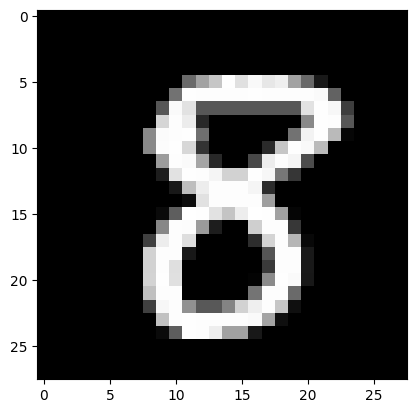

In [9]:

plt.imshow(x_train[333], cmap='Greys_r')

Check the shape of the x_train and x_test

In [12]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


* Convert the x_train and x_test
* Cast the numbers to floats
* Normalize the inputs

In [13]:

x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255


Convert class vectors to binary class matrices

In [14]:

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

* Build the model with two hidden layers of size 512.
* Use dropout of 0.2
* Check the model summary

In [15]:

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model using learning rate of 0.001 and optimizer of RMSprop

In [18]:
learning_rate = .001
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7399 - loss: 0.8439 - val_accuracy: 0.9401 - val_loss: 0.2002
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9215 - loss: 0.2668 - val_accuracy: 0.9542 - val_loss: 0.1500
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9387 - loss: 0.2063 - val_accuracy: 0.9625 - val_loss: 0.1261
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9462 - loss: 0.1765 - val_accuracy: 0.9669 - val_loss: 0.1130
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9541 - loss: 0.1541 - val_accuracy: 0.9664 - val_loss: 0.1112
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9581 - loss: 0.1440 - val_accuracy: 0.9702 - val_loss: 0.1043
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9597 - loss: 0.1341 - val_accuracy: 0.9733 - val_loss: 0.0972
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9625 - loss: 0.1280 - val_accuracy: 0.

Use Keras evaluate function to evaluate performance on the test set

In [19]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09598096460103989
Test accuracy: 0.9764999747276306


Interpret the result

#type your answer here

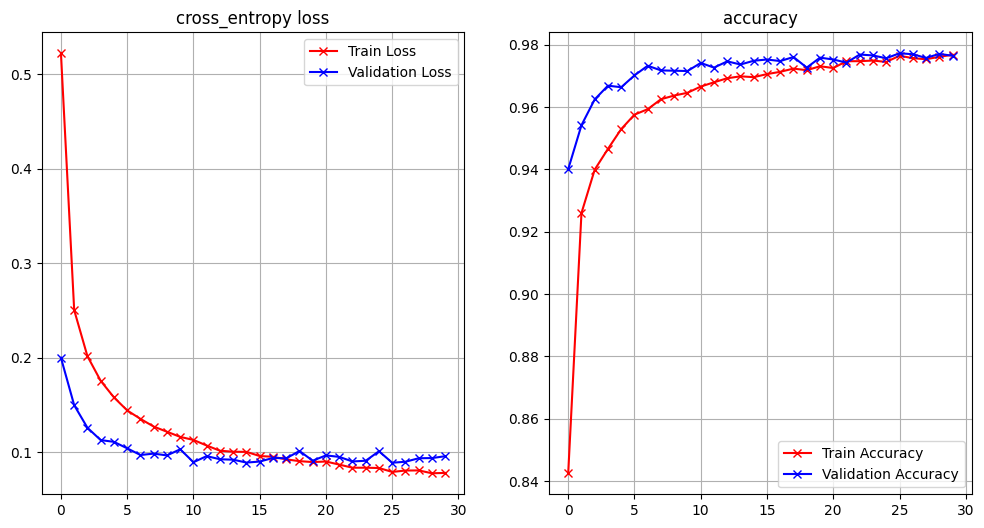

In [20]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

<b>Observation</b>
- After finishing the training of the model it shows that the model was able to obtain an excellent performance interms of predicting the unseen model. I also observe that even though we have multiple layers that can cause overfitting of the model since we add dropout which is a model regularization which helps to avoid overfitting of the model.

#type your answer here

#### Supplementary Activity

* Use the Keras "Sequential" functionality to build a new model (model_1) with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Use at least two  regularization techniques and apply it to the new model (model_2)
7. Train this model for your preferred epochs , learning rate, batch size and optimizer
8. Compare the accuracy and loss (training and validation) of model_1 and model_2

<font size = 6> <b>Supplementary</font>

In [ ]:
#type your code here
#Two hidden layers.
#First hidden layer of size 400 and second of size 300
#Dropout of .4 at each layer

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer

In [21]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [22]:
x_train.shape

(60000, 784)

In [29]:
from keras.src.optimizers import optimizer
input = Input((784,), name = 'inputlayer')
X = Dense(400, activation = 'relu', name = 'layer1')(input)
X = Dropout(0.4)(X)
X = Dense(300, activation = 'relu', name = 'layer2')(X)
X = Dropout(0.4)(X)

output = Dense(10, activation='softmax', name = 'outputlayer')(X)
model_1 = Model( inputs = input, outputs = output, name = 'MNISTmodel1')
model_1.compile(optimizer = RMSprop(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

4. How many parameters does your model have? How does it compare with the previous model?

In [30]:
model_1.summary()

Model: "MNISTmodel1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputlayer (InputLayer)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 437,310 (1.67 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

<b> Observation</b>
- By comparing the current model to the previous ANN mdoe. It shows that current models has 437,310 total parameters which is a really huge difference compare the recent one since we use a 400 neurons and 300 neurons in the current model


5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [31]:
model_1_hist = model_1.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data=(x_test,y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8247 - loss: 0.5537 - val_accuracy: 0.9607 - val_loss: 0.1240
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9519 - loss: 0.1612 - val_accuracy: 0.9710 - val_loss: 0.0934
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9640 - loss: 0.1217 - val_accuracy: 0.9750 - val_loss: 0.0850
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.9779 - val_loss: 0.0737
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9729 - loss: 0.0888 - val_accuracy: 0.9767 - val_loss: 0.0771
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9766 - loss: 0.0754 - val_accuracy: 0.9813 - val_loss: 0.0663
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9773 - loss: 0.0711 - val_accuracy: 0.9799 - val_loss: 0.0717
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9799 - loss: 0.0668 - val_a

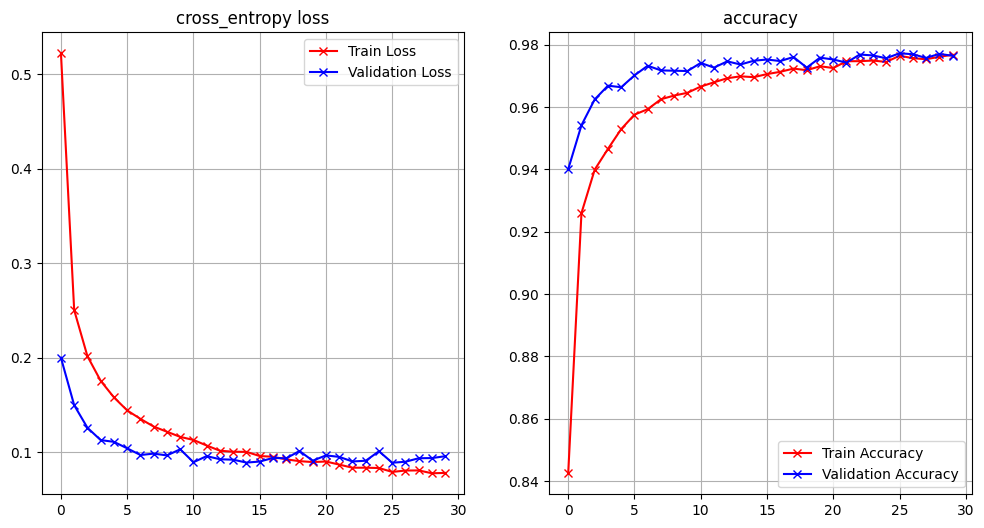

In [32]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

<b> Observation</b>
- After completing teh training time of the model, the current model was able to achive a highest accuracy compare to the recent model. I think this happens because the used layers are the most optimized model for this problem.

<b> 6. Use at least two regularization techniques and apply it to the new model (model_2)

<b>Creating my own model

In [54]:
# first regularization
from tensorflow.keras.callbacks import EarlyStopping

checkpoint = EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)

In [55]:
# second regularization using batch nomalization
from tensorflow.keras.layers import BatchNormalization

In [56]:
# third regularization using l2
from tensorflow.keras.regularizers import L2 # this will be used in each layers

# the last normalization is the dropout

<b>Creating the model

In [71]:
input = Input((784,), name = 'Inputlayer')

X = Dense(400, activation = 'relu', kernel_regularizer= L2(0.01), name= 'layer1')(input)
X = Dropout(0.4)(X)
X = BatchNormalization()(X)
X = Dense(300, activation = 'relu', kernel_regularizer=L2(0.01), name = 'layer2')(X)
X = Dropout(0.4)(X)
X = Dense(128, activation = 'relu', kernel_regularizer=L2(0.01), name = 'layer3')(X)
X = Dropout(0.2)(X)



output = Dense(10, activation = 'softmax', name='outputlayer')(X)

model_2 = Model(inputs = input, outputs = output, name= 'MNISTmodel2')
model_2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [72]:
model_2.summary()

Model: "MNISTmodel2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputlayer (InputLayer)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputlayer (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,718 (1.81 MB)

 Trainable params: 474,918 (1.81 MB)

 Non-trainable params: 800 (3.12 KB)

In [73]:
model_2_hist = model_2.fit(x_train,y_train, batch_size = 128, epochs = 20, callbacks = [checkpoint], validation_data=(x_test,y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.7925 - loss: 5.0976 - val_accuracy: 0.9390 - val_loss: 0.6139
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9292 - loss: 0.6105 - val_accuracy: 0.9398 - val_loss: 0.5433
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9248 - loss: 0.5905 - val_accuracy: 0.9420 - val_loss: 0.5052
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9248 - loss: 0.5751 - val_accuracy: 0.9400 - val_loss: 0.5144
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9194 - loss: 0.5718 - val_accuracy: 0.9493 - val_loss: 0.4611
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9210 - loss: 0.5507 - val_accuracy: 0.9400 - val_loss: 0.4822
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9227 - loss: 0.5430 - val_accuracy: 0.9460 - val_loss: 0.4583
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9206 - loss: 0.5412 - val_a

<b> 9. Compare the accuracy and loss (training and validation) of model_1 and model_2

<font size = 5>Model 1

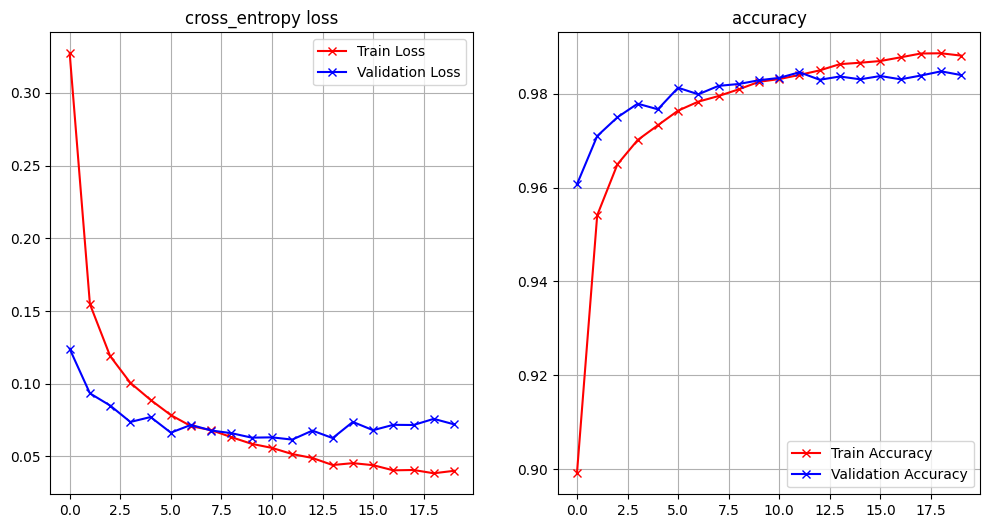

In [74]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(model_1_hist.history["loss"],'r-x', label="Train Loss")
    ax.plot(model_1_hist.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(model_1_hist.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(model_1_hist.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

<font size = 5>Model 2

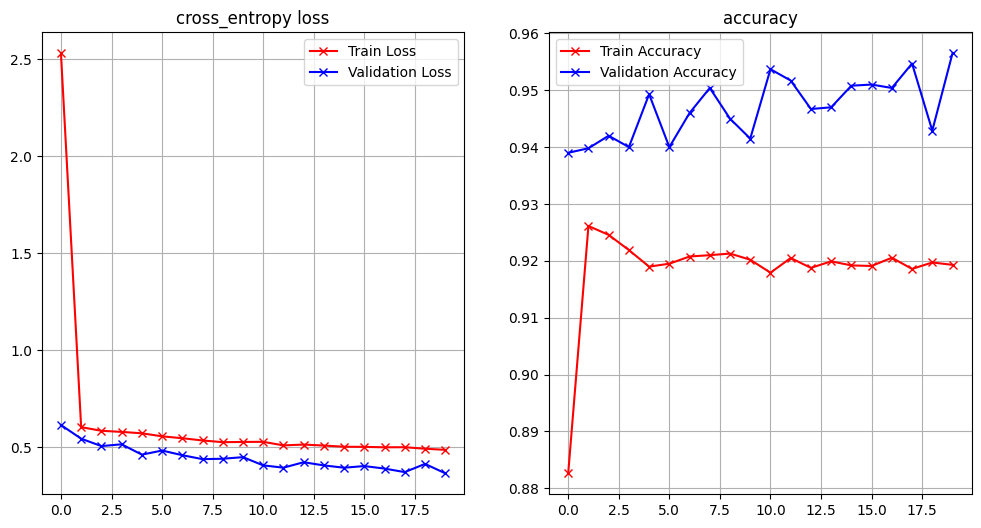

In [75]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(model_2_hist.history["loss"],'r-x', label="Train Loss")
    ax.plot(model_2_hist.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(model_2_hist.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(model_2_hist.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)


plot_loss_accuracy(history)

<b>Observation</b>

- After training the second model, we have now a 2 loss and accuracy graphs that compare the performance of the model 1 and model 2. By observing their performance we can see that model 1 achives a higher accuracy and low fluctuation in the loss function compare to model 2. For the model 2 it tends to have a lower accuracy since we maximized the usage of regularization for this model. While training the model I observed that too much regularization parameter can cause a model to ignore the data completely and the norm of the weights will be forced arbitrarily close to zero. Its like adding to much regularization makes our model underfit so we need to tune it properly to make our model become better at generalizing data or unseen datasets.

# <font size = 6><b>Conclusion</font>

- After completing the activity I was able to learn how different kinds of regularization helps the model in improving its generalization through unseen dataset. From this activity I was able to use different kinds of regularization such as Batch Normalization which allows the model to use much higher learning rates. Next is the L2 regularization or penalty regularization which is a regularization method that reduces overfitting of the model by penalizing high value coefficient of the model. Next is the dropout which a regularization method that deactivating some of the neurons of everylayer while training to avoid overfitting. Lastly is the callback method from the tensorflow which is the earlystopping which is use to monitor the performance of the model why training to stop the model training when the accuracy doesnt increase or the loss increases to avoid long time training as well as to save the bestweights of the overall model trained. Overall, I enjoy the activity since I was able to test the effect of maximizing the regularizations in the ANN model and to see its performance in predicting unseen dataset.